#### Name : SINU S MARIAM
#### Designation : Data Science Intern  
#### Organization : OASIS INFOBYTE
#### Batch : FEBRUARY P-2
#### # Task 4 - EMAIL SPAM DETECTION WITH MACHINE LEARNING
#### Problem Statement:
* Use Python to develop Email Spam Detector.
* Use Machine Learning to train Spam Detector to recognize and classify Emails into Spam and Non- Spam mails.

In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing Data
data_frame = pd.read_csv('C:/Users/sinun/OneDrive/Documents/oasis infobyte/email_spam/spam.csv')

####  Performing descriptive analysis. Understand the variables and their corresponding values. 

In [3]:
# Understanding the dimensions of data
data_frame.shape

(5572, 5)

In [4]:
# Understanding the Data Variables
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data_frame.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

##### * Column v2 contains texts of emails and v1 contains whether those emails are spam or not

In [6]:
# Show the top 10 Rows of data
data_frame.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [7]:
# Checking for any Duplicated Entries
data_frame.duplicated().sum()

403

In [8]:
data_frame.drop_duplicates(keep = 'first', inplace = True)
data_frame.shape

(5169, 5)

In [9]:
#Detecting missing values
data_frame.isna().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [10]:
#Dropping unwanted Columns from data
data_frame.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True )
data_frame.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Data Visualization

In [11]:
# Finding the number of spam and non-spam mails in dataset
data_frame['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

<AxesSubplot:title={'center':'Histogram of Spam and Ham'}, xlabel='v1'>

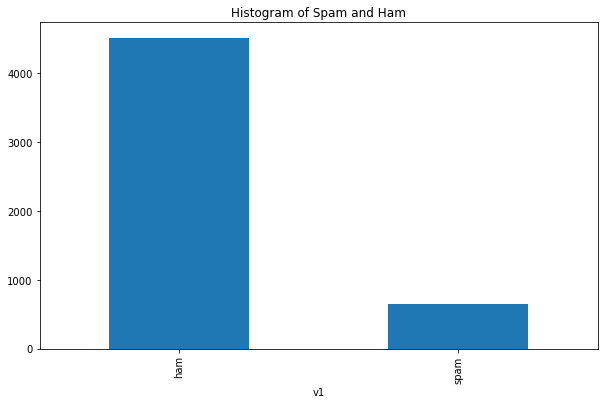

In [12]:

data_frame['v1'].value_counts().plot(kind='bar',figsize=(10,6),title="Histogram of Spam and Ham",xlabel="v1")

In [13]:
# Printing examples of ham messages
print("Some examples of ham messages:")
print(data_frame[data_frame['v1'] == 'ham']['v2'].head())

Some examples of ham messages:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: v2, dtype: object


In [14]:
# Printing examples of spam messages
print(" Some examples of spam messages:")
print(data_frame[data_frame['v1'] == 'spam']['v2'].head())

 Some examples of spam messages:
2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: v2, dtype: object


In [15]:
# Labelling Spam mails as 1 and Non-Spam Mails as 0
data_frame['v1'] = np.where(data_frame['v1'] == 'spam',1,0)
data_frame

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


#### Building the Model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#First step in building the model is to identify the Feature(Input) variables and Target (Output) variable
#Features are the emails
#Target represents the labels for spam and ham emails
features = data_frame['v2']
target = data_frame['v1']

#####  * Splitting data for training and testing the model

In [18]:
# Splitting data for training the model and testing the model
# train size taken as 0.8
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .8)
# Dimensions of Train and Test Data sets
print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', y_train.shape)
print('Target for test: ', y_test.shape)

Train set of features:  (4135,)
Test set of features:  (1034,)
Target for train:  (4135,)
Target for test:  (1034,)


### Learn the model on train data

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
#CountVectorizer transform text into a vector on the basis of the frequency/count of each word that occurs in entire text.
#Covert each word in Train dataset into vectors for using them in further text analysis.
cv=CountVectorizer()
X_train_vector=cv.fit_transform(X_train.values)
X_train_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
# Here Multinomial Naive Bayes model which is a supervised learning classification 
#Used for the analysis of the categorical text data. 
from sklearn.naive_bayes import MultinomialNB
my_model=MultinomialNB()

In [22]:
# Fitting the model in train data set ie the MultinomialNB Model should learn from the Train Data
my_model.fit(X_train_vector, y_train)

MultinomialNB()

In [23]:
#Coverting each word in Test dataset into vectors for using them in further text analysis.
X_test_vector=cv.transform(X_test.values)
X_test_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Prediction

In [24]:
# Predicting whether the mails in Test Dataset are spam or non-spam using our model from Feature Test values
y_pred = my_model.predict(X_test_vector)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

#### Testing the model

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
# find Accurancy Score = (TP+TN)/(TP+TN+FP+FN)
accuracy_score(y_test, y_pred)

0.9903288201160542

In [27]:
# find Precision Score= TP/(TP+FP)
precision_score(y_test, y_pred)

0.9754098360655737

In [28]:
# Recall = TP/(TP+FN)
# Recall gives the percentage of positives well predicted by our model.
recall_score(y_test, y_pred)

0.9444444444444444

In [29]:
# f1_score= (Precition * Recall )/ (Precition + Recall)
f1_score(y_test, y_pred)

0.9596774193548386